<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Politécnica_Salesiana_del_Ecuador.png" width="90%">
<h2>Práctica 5:
    Redes Neuronales Problemas Multiclase</h2>
<h3>Integrantes: Michelle Parraga, Andrés Alba </h3>

##  <span style="color:BLUE">DESCRIPCIÓN DE DATASET Y EXPLORACIÓN</span>

Carga del dataset desde un arhivo local.

Dataset: CIFAR10 que contiene 60000 imágenes (samples) de 10 categorías: 

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

El dataset se dividirá en 50000 imágenes para train y 10000 para test. 
Cada imagen de 32x32pixeles. 3 canales. 10000 imagenes por cada batch para evitar un desbordamiento de memoria.
Cada fila (imagen) de CIFAR10 es de 3072 columnas. 32pixeles x 32pixeles x 3canales = 3072 características

url: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Para descomprimir el dataset del archivo tar.gz sería:

!tar xzvf cifar-10-python.tar.gz

In [1]:
import tarfile
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
print('importadas')

importadas


In [2]:
#Para cargar el Dataset desde la web
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Dataset Cargado')

Dataset Cargado


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
#Primera imagen
X_train[0].shape

(32, 32, 3)

In [5]:
X_trainReshapeImageRow=X_train.reshape((X_train.shape[0],3072))
print(X_trainReshapeImageRow.shape)                 
X_testReshapeImageRow=X_test.reshape((X_test.shape[0],3072))
print(X_testReshapeImageRow.shape)   

(50000, 3072)
(10000, 3072)


In [6]:
X_trainReshapeImageRow[0].shape

(3072,)

In [7]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


Samples (cantidad de imágenes): 50000
Cantidad de Etiquetas: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}

Imagen 9999:
Imagen - Valor Min: 4 Valor Max: 252
Imagen - Shape: (3072,)
Etiqueta - Etiqueta Id: 5 Nombre: dog


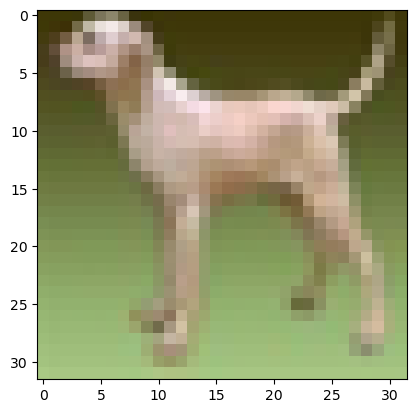

In [8]:
import cv2 as cv                  # open vision library OpenCV

def _load_label_names():
    """
    Load the label names from file
    """
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_stats(sample_id):
    """
    Display Stats of the the dataset
    """
    features, labels = X_trainReshapeImageRow, y_train

    print('Samples (cantidad de imágenes): {}'.format(len(features)))
    print('Cantidad de Etiquetas: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    #print('Primeras 20 Etiquetas: {}'.format(labels[:20]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id][0]
    label_names = _load_label_names()

    print('\nImagen {}:'.format(sample_id))
    print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
    print('Imagen - Shape: {}'.format(sample_image.shape))
    print('Etiqueta - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))
    #plt.axis('off')
    imagen=sample_image.reshape(32, 32, 3)#.transpose(1, 2, 0)
    plt.imshow(imagen)
    cv.imwrite('imagen.jpg', imagen)

sample_id = 9999
display_stats(sample_id)

##  <span style="color:BLUE">CARGA DE DATASET Y PREPROCESAMIENTO</span>

In [10]:
#normalizamos tanto X_train como X_test

#Primera forma
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

#x_train = normalize(X_train)
#x_test = normalize(X_test)

#Segunda forma
x_train = X_train/255
x_test = X_test/255

print("Normalización lista")
#Ejemplo para verificar
print('x:',X_test[9999,1,1,1])
print("""x':""",x_test[9999,1,1,1])

Normalización lista
x: 89
x': 0.34901960784313724


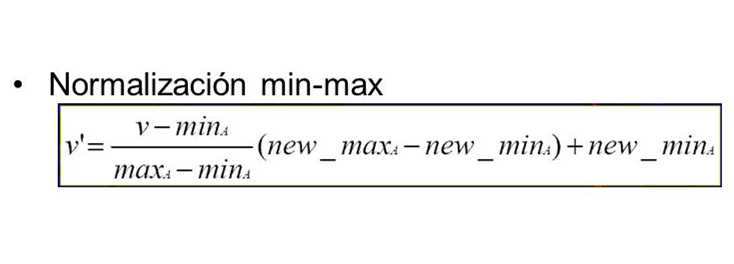

In [11]:
x_train=X_trainReshapeImageRow
x_test=X_testReshapeImageRow

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [13]:
# Proceso Clasificación con Red Neuronal

# Añade aquí tu código

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))   
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
#en la última capa tiene que haber tantas neuronas como clases haya, en este caso 10
model.add(Dense(10, activation='softmax'))

#compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

size_batch = 512
epocas = 40
history = model.fit(x_train, y_train, batch_size= size_batch, epochs=epocas, verbose=1)

Epoch 1/40
98/98 [==============================] - 4s 22ms/step - loss: 2.6692 - accuracy: 0.1984
Epoch 2/40
98/98 [==============================] - 2s 19ms/step - loss: 1.9023 - accuracy: 0.3081
Epoch 3/40
98/98 [==============================] - 2s 19ms/step - loss: 1.8448 - accuracy: 0.3307
Epoch 4/40
98/98 [==============================] - 2s 21ms/step - loss: 1.7936 - accuracy: 0.3487
Epoch 5/40
98/98 [==============================] - 2s 20ms/step - loss: 1.7855 - accuracy: 0.3516
Epoch 6/40
98/98 [==============================] - 2s 19ms/step - loss: 1.7471 - accuracy: 0.3638
Epoch 7/40
98/98 [==============================] - 2s 19ms/step - loss: 1.7214 - accuracy: 0.3761
Epoch 8/40
98/98 [==============================] - 2s 19ms/step - loss: 1.7061 - accuracy: 0.3810
Epoch 9/40
98/98 [==============================] - 2s 19ms/step - loss: 1.6930 - accuracy: 0.3856
Epoch 10/40
98/98 [==============================] - 2s 19ms/step - loss: 1.7117 - accuracy: 0.3751
Epoch 11/

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6694 - accuracy: 0.4113


[1.6693987846374512, 0.41130000352859497]

In [15]:
#Predicciones
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1) 
y_pred = y_pred.flatten()
y_test2 = y_test.flatten()
print(y_pred)
print(y_test2)
dataframeFinal=pd.DataFrame({'real':y_test2, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

313/313 [==============================] - 1s 2ms/step
[1 8 8 ... 3 6 2]
[3 8 8 ... 5 1 7]


,real,predicción
0,3,1
1,8,8
2,8,8
3,0,0
4,6,4
5,6,6
6,1,6
7,6,4
8,3,2
9,1,1


Mean Absolute Error (MAE): 2.1393
Mean Squared Error (MSE): 11.0845
Root Mean Squared Error (RMSE): 3.3293
Accuracy: 0.4113
Precision:  0.4077
Recall:  0.4113
F1: 0.4063
Matriz de confusión:
[[535  48  82  32  13  18  34  59 126  53]
 [ 60 507  25  33  19  35  44  34  66 177]
 [112  36 337  52 126  61 123 102  37  14]
 [ 56  24 110 200  69 154 231  73  40  43]
 [ 66  13 220  59 257  42 163 146  20  14]
 [ 25  21 142 152  70 286 133  97  42  32]
 [ 13  29 142  87  83  68 517  35   6  20]
 [ 48  34  71  53  93  69  41 510  27  54]
 [168  88  34  37  12  31  15  21 500  94]
 [ 53 193  17  43   9  28  47  58  88 464]]


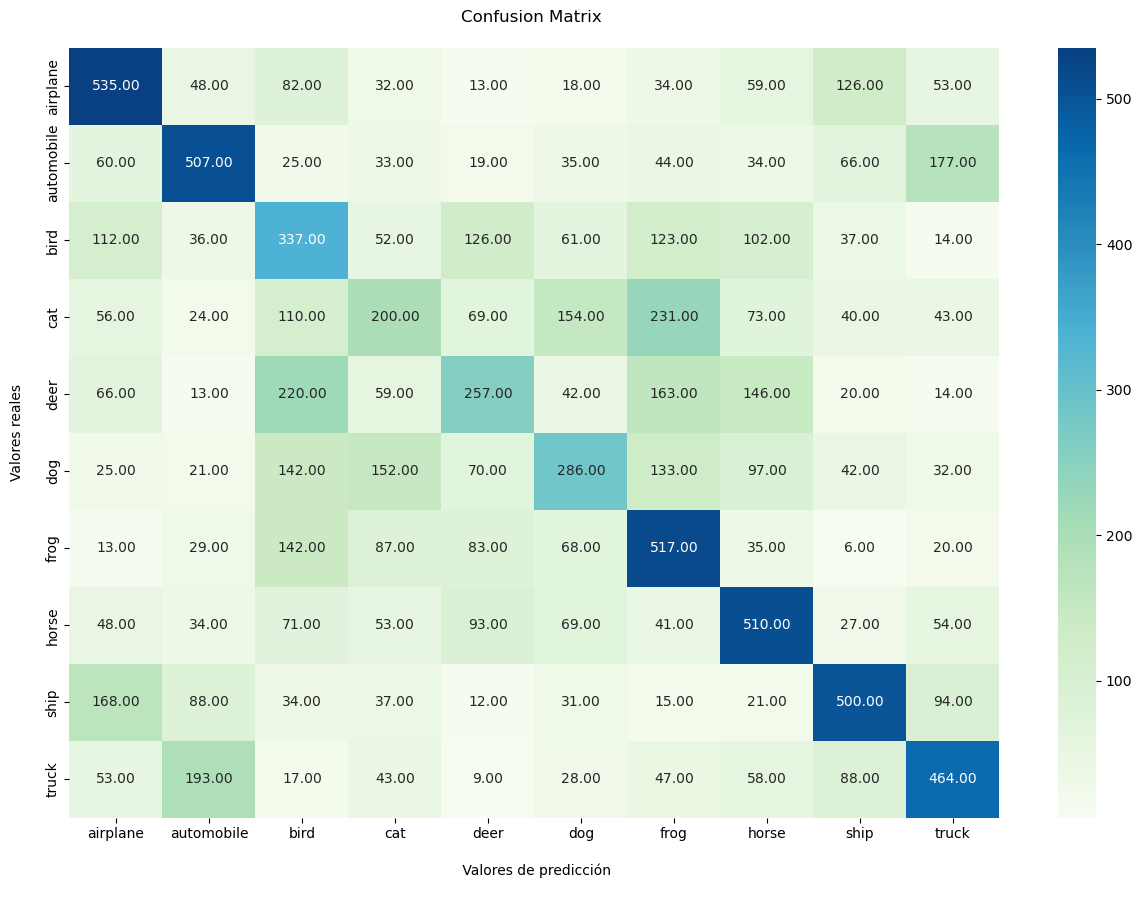

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt 

MAE=metrics.mean_absolute_error(y_test2, y_pred)
MSE=metrics.mean_squared_error(y_test2, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test2, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

accuracyModeloBase=str(accuracy_score(y_test2,y_pred))
print('Accuracy: ' + accuracyModeloBase) 

precision=precision_score(y_test2,y_pred, average='weighted')#average one of [None, 'micro', 'macro', 'weighted']
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_test2,y_pred, average='weighted')
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_test2,y_pred, average='weighted')
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
print(confusion_matrix(y_test2,y_pred))  

plt.figure(figsize=(15,10))
fx=sns.heatmap(confusion_matrix(y_test2,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n');
fx.xaxis.set_ticklabels(_load_label_names())
fx.yaxis.set_ticklabels(_load_label_names())
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.54      0.50      1000
           1       0.51      0.51      0.51      1000
           2       0.29      0.34      0.31      1000
           3       0.27      0.20      0.23      1000
           4       0.34      0.26      0.29      1000
           5       0.36      0.29      0.32      1000
           6       0.38      0.52      0.44      1000
           7       0.45      0.51      0.48      1000
           8       0.53      0.50      0.51      1000
           9       0.48      0.46      0.47      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000



##  <span style="color:BLUE">Predicción con imagen específica del conjunto de Test</span>

1/1 [==============================] - 0s 17ms/step


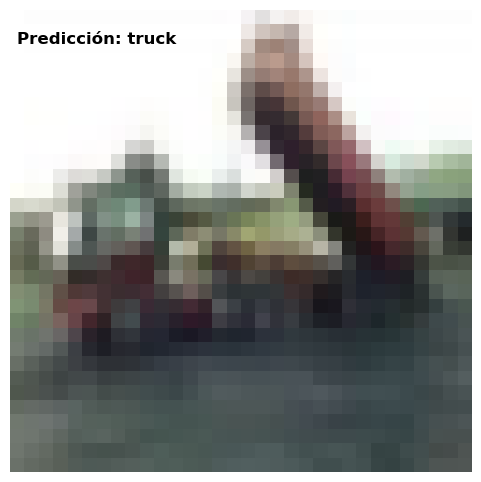

Predicción final: truck (Valor: 0.8432)


In [69]:
import cv2
import matplotlib.pyplot as plt

# Índice de la imagen en el conjunto de datos
image_index = 2

# Obtener la imagen del conjunto de datos
image = X_trainReshapeImageRow[image_index]

# Cargar y preprocesar la imagen
image = image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(image)
predictions = predictions.flatten()

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

# Mostrar la imagen con el resultado en la parte superior
fig = plt.figure(figsize=(6, 6))
plt.text(0, 1.05, 'Predicción: {}'.format(predicted_class_name), fontsize=12, weight='bold', ha='left', va='top')
plt.imshow(image.reshape(32, 32, 3))
plt.axis('off')
plt.show()

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))


##  <span style="color:BLUE">Predicción con  imagen nueva indicando el PATH</span>

1/1 [==============================] - 0s 20ms/step


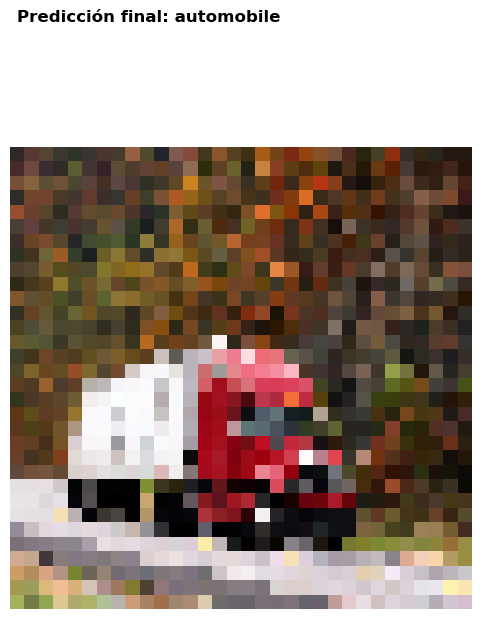

Predicción final: automobile (Valor: 0.7466)


In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen en tu escritorio
image_path = "C:\\Users\\Miche\\Downloads\\camion.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Dimensiones deseadas
desired_width = 32
desired_height = 32

# Redimensionar la imagen
resized_image = cv2.resize(image, (desired_width, desired_height))

# Aplanar la imagen
flattened_image = resized_image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(flattened_image)
predictions = predictions.flatten()

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

# Mostrar la imagen con el nombre de la predicción en la parte superior
fig = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.text(0, -10, 'Predicción final: {}'.format(predicted_class_name), fontsize=12, fontweight='bold', color='black', ha='left', va='top')
plt.show()

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))

1/1 [==============================] - 0s 21ms/step


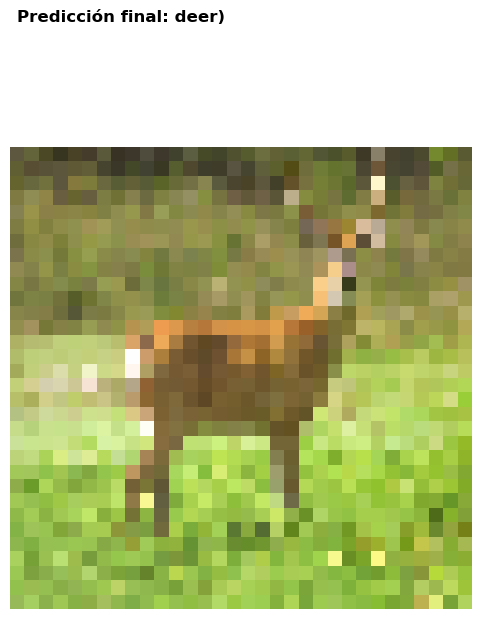

Predicción final: deer (Valor: 0.4240)


In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen en tu escritorio
image_path = "C:\\Users\\Miche\\Downloads\\venado.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Dimensiones deseadas
desired_width = 32
desired_height = 32

# Redimensionar la imagen
resized_image = cv2.resize(image, (desired_width, desired_height))

# Aplanar la imagen
flattened_image = resized_image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(flattened_image)
predictions = predictions.flatten()

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

# Mostrar la imagen con el nombre de la predicción en la parte superior
fig = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.text(0, -10, 'Predicción final: {})'.format(predicted_class_name), fontsize=12, fontweight='bold', color='black', ha='left', va='top')
plt.show()

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))


##  <span style="color:BLUE">Predicción con imagen capturada desde una cámara</span>

1/1 [==============================] - 0s 19ms/step


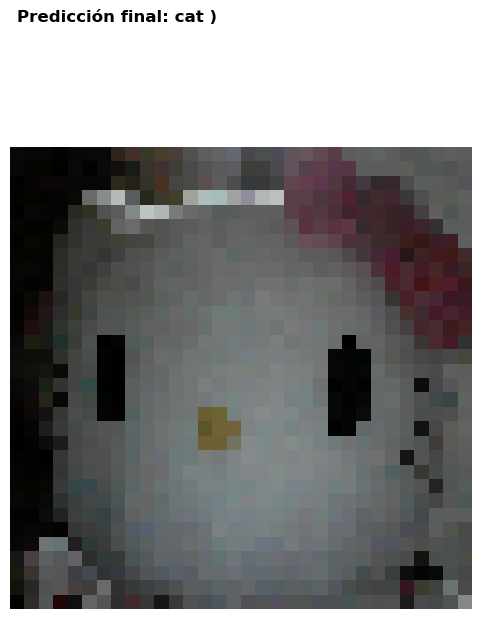

Predicción final: cat (Valor: 0.2672)


In [68]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Capturar imagen desde la cámara
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

# Dimensiones deseadas
desired_width = 32
desired_height = 32

# Redimensionar la imagen capturada
resized_image = cv2.resize(frame, (desired_width, desired_height))

# Aplanar la imagen
flattened_image = resized_image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(flattened_image)
predictions = predictions.flatten()

# Mostrar la imagen capturada con el resultado de la predicción
fig = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.text(0, -10, 'Predicción final: {} )'.format(predicted_class_name), fontsize=12, fontweight='bold', color='black', ha='left', va='top')
plt.show()

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))

# Liberar la cámara
cap.release()
cv2.destroyAllWindows()


<h4> Resultados y Conclusiones</h4>

<ul>
   
<li>El dataset CIFAR-10 tiene 60.000 imágenes en color de 32 por 32 píxeles en diez clases que son los siguientes <b>(avión, automóvil,pájaro,gato,Ciervo,perro,rana,caballo,navío,camión) </b>, cada una con 6000 imágenes. Hay cincuenta mil imágenes de entrenamiento y diez mil imágenes de prueba.</li>
<li>En conclusión, el método de normalización buscan escalar los valores de los datos de entrada en un rango específico para facilitar su procesamiento en modelos de aprendizaje automático. La primera forma calcula los valores mínimo y máximo para normalizar, mientras que la segunda forma divide por el valor máximo posible en el rango de los datos de entrada. Ambos enfoques deberían producir resultados similares en términos de normalización.</li>
<li>La red neuronal secuencial se define como un modelo secuencial, donde se agregan capas densas con diferentes configuraciones de neuronas y funciones de activación ReLU y Softmax. Se compila con una función de pérdida, optimizador y métricas, y luego se entrena con los datos de entrenamiento. Este código es útil para entrenar redes neuronales en problemas de clasificación, permitiendo aprender representaciones complejas de los datos y adaptarse a diferentes casos.</li>
<li>Mediante la red neuronal nuestro objetivo es mejorar que haya menos pérdida que sea llegando a 0 y más exactitud que sea más cercano a 1 como resultado tenemos (loss: 1.6694) puedo considerar que no esta un valor alto en pérdida pero se puede mejorar y se logro llegar a una exactitud (accuracy: 0.4113) que se fue mejorando sin embargo lo más ideal es llegar por lo menos un 0.5 de exactitud</li>
<li><b></b></li>

<h4> Referencias</h4>

<ul>
   
<li>CIFAR-10 and CIFAR-100 datasets. (s/f). Toronto.edu. Recuperado el 6 de julio de 2023, de https://www.cs.toronto.edu/~kriz/cifar.html</li>
<li>(S/f). Machinelearningmastery.com. Recuperado el 6 de julio de 2023, de https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

</li>
